<a href="https://colab.research.google.com/github/amazighy/DataAnalysis/blob/master/YazidMLFinal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:

from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


# **This downloads the OpenImages.zip**

In [2]:
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=1N-uq3e4LAYsMTO68Rk7VyWOTAphwSgOD' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=1N-uq3e4LAYsMTO68Rk7VyWOTAphwSgOD" -O OpenImages.zip && rm -rf /tmp/cookies.txt

--2020-12-13 01:08:23--  https://docs.google.com/uc?export=download&confirm=ULnc&id=1N-uq3e4LAYsMTO68Rk7VyWOTAphwSgOD
Resolving docs.google.com (docs.google.com)... 172.217.7.174, 2607:f8b0:4004:800::200e
Connecting to docs.google.com (docs.google.com)|172.217.7.174|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-10-8g-docs.googleusercontent.com/docs/securesc/mo2k3rb5t28qugi8kdc759j4nknm9jnb/9eigce1atp68o13mba4g220483r5ko6t/1607821650000/09049346734615172720/18379553547734319370Z/1N-uq3e4LAYsMTO68Rk7VyWOTAphwSgOD?e=download [following]
--2020-12-13 01:08:23--  https://doc-10-8g-docs.googleusercontent.com/docs/securesc/mo2k3rb5t28qugi8kdc759j4nknm9jnb/9eigce1atp68o13mba4g220483r5ko6t/1607821650000/09049346734615172720/18379553547734319370Z/1N-uq3e4LAYsMTO68Rk7VyWOTAphwSgOD?e=download
Resolving doc-10-8g-docs.googleusercontent.com (doc-10-8g-docs.googleusercontent.com)... 172.217.12.225, 2607:f8b0:4004:807::2001
Connecting to doc-10-

In [3]:
!unzip OpenImages.zip

Streaming output truncated to the last 5000 lines.
  inflating: OpenImages/val/person-000266c1e4c17092.xml  
  inflating: OpenImages/val/person-00026912315fd226.xml  
  inflating: OpenImages/val/person-000344d9009b4ef5.jpg  
  inflating: OpenImages/val/person-000c034c59effe6d.xml  
  inflating: OpenImages/val/person-000c6cfed47c0069.jpg  
  inflating: OpenImages/val/person-001ebdc4669648f4.xml  
  inflating: OpenImages/val/person-0020005ec801b28a.jpg  
  inflating: OpenImages/val/person-0020cf51ad075fd3.xml  
  inflating: OpenImages/val/person-006237b22635e981.jpg  
  inflating: OpenImages/val/person-008a9370ee5a3bba.xml  
  inflating: OpenImages/val/person-008e8ab24b356a98.xml  
  inflating: OpenImages/val/person-00912a6388c17c1e.xml  
  inflating: OpenImages/val/person-00a5fb71efed983a.xml  
  inflating: OpenImages/val/person-00d1eca3f26d243d.jpg  
  inflating: OpenImages/val/person-00d1eca3f26d243d.xml  
  inflating: OpenImages/val/plant-02b76d355f971db8.xml  
  inflating: OpenImage

In [4]:
!rm -r OpenImages.zip

In [5]:
%tensorflow_version 1.x

TensorFlow 1.x selected.


In [6]:
!pip3 uninstall -y keras
!pip3 install keras==2.1.0

Uninstalling Keras-2.3.1:
  Successfully uninstalled Keras-2.3.1
     |████████████████████████████████| 307kB 12.8MB/s 
ERROR: textgenrnn 1.4.1 has requirement keras>=2.1.5, but you'll have keras 2.1.0 which is incompatible.
  Found existing installation: Keras 2.4.3
    Uninstalling Keras-2.4.3:
      Successfully uninstalled Keras-2.4.3


In [7]:
!git clone https://github.com/matterport/Mask_RCNN
%cd Mask_RCNN
!pip3 install -r requirements.txt
!python3 setup.py install

Cloning into 'Mask_RCNN'...
remote: Enumerating objects: 956, done.
remote: Total 956 (delta 0), reused 0 (delta 0), pack-reused 956
Receiving objects: 100% (956/956), 125.23 MiB | 40.67 MiB/s, done.
Resolving deltas: 100% (560/560), done.
/content/Mask_RCNN
     |████████████████████████████████| 163kB 14.5MB/s 
     |████████████████████████████████| 204kB 23.8MB/s 
  Created wheel for gast: filename=gast-0.2.2-cp36-none-any.whl size=7542 sha256=b0682cb4c20f39e0ac846e94557c49018a22945efc46f92c3d88f40a3e6f2a3f
  Stored in directory: /root/.cache/pip/wheels/5c/2e/7e/a1d4d4fcebe6c381f378ce7743a3ced3699feb89bcfbdadadd
Successfully built gast
  Found existing installation: gast 0.3.3
    Uninstalling gast-0.3.3:
      Successfully uninstalled gast-0.3.3
running install
running bdist_egg
running egg_info
creating mask_rcnn.egg-info
writing mask_rcnn.egg-info/PKG-INFO
writing dependency_links to mask_rcnn.egg-info/dependency_links.txt
writing top-level names to mask_rcnn.egg-info/top_level.

In [8]:
!git clone https://github.com/cocodataset/cocoapi.git
%cd cocoapi/PythonAPI
!make

Cloning into 'cocoapi'...
remote: Enumerating objects: 975, done.
remote: Total 975 (delta 0), reused 0 (delta 0), pack-reused 975
Receiving objects: 100% (975/975), 11.72 MiB | 33.16 MiB/s, done.
Resolving deltas: 100% (576/576), done.
/content/Mask_RCNN/cocoapi/PythonAPI
python setup.py build_ext --inplace
running build_ext
cythoning pycocotools/_mask.pyx to pycocotools/_mask.c
/usr/local/lib/python3.6/dist-packages/Cython/Compiler/Main.py:369: FutureWarning: Cython directive 'language_level' not set, using 2 for now (Py2). This will change in a later release! File: /content/Mask_RCNN/cocoapi/PythonAPI/pycocotools/_mask.pyx
  tree = Parsing.p_module(s, pxd, full_module_name)
building 'pycocotools._mask' extension
creating build
creating build/common
creating build/temp.linux-x86_64-3.6
creating build/temp.linux-x86_64-3.6/pycocotools
x86_64-linux-gnu-gcc -pthread -DNDEBUG -g -fwrapv -O2 -Wall -g -fstack-protector-strong -Wformat -Werror=format-security -Wdate-time -D_FORTIFY_SOURCE=2

In [9]:
%cd ../../

/content/Mask_RCNN


In [10]:
import os
import sys
import random
import math
import re
import time
import numpy as np
import cv2
import matplotlib
import matplotlib.pyplot as plt
import xml.etree.ElementTree as ET

# Root directory of the project
ROOT_DIR = os.path.abspath("../")

# Import Mask RCNN
sys.path.append(ROOT_DIR)  # To find local version of the library
from mrcnn.config import Config
from mrcnn import utils
import mrcnn.model as modellib
from mrcnn import visualize
from mrcnn.model import log

%matplotlib inline 



Using TensorFlow backend.


# *very imoportant  save the model in the drive Not in colab**
> # **exemple** /content/gdrive/MyDrive/logs

In [11]:
# Directory to save logs and trained model
MODEL_DIR = os.path.join(ROOT_DIR, "/content/gdrive/MyDrive/logs")

# Local path to trained weights file
COCO_MODEL_PATH = os.path.join(ROOT_DIR, "mask_rcnn_coco.h5")
# Download COCO trained weights from Releases if needed
if not os.path.exists(COCO_MODEL_PATH):
    utils.download_trained_weights(COCO_MODEL_PATH)

... done downloading pretrained model!


In [31]:
class MicrocontrollerConfig(Config):
    # Give the configuration a recognizable name
    NAME = "OpenImages"
    
    NUM_CLASSES = 1 + 80

    GPU_COUNT = 1
    IMAGES_PER_GPU = 1
    STEPS_PER_EPOCH = 1000
    BATCH_SIZE = 32
    TRAIN_ROIS_PER_IMAGE=100
    LEARNING_RATE = 0.001

config = MicrocontrollerConfig()
config.display()


Configurations:
BACKBONE                       resnet101
BACKBONE_STRIDES               [4, 8, 16, 32, 64]
BATCH_SIZE                     1
BBOX_STD_DEV                   [0.1 0.1 0.2 0.2]
COMPUTE_BACKBONE_SHAPE         None
DETECTION_MAX_INSTANCES        100
DETECTION_MIN_CONFIDENCE       0.7
DETECTION_NMS_THRESHOLD        0.3
FPN_CLASSIF_FC_LAYERS_SIZE     1024
GPU_COUNT                      1
GRADIENT_CLIP_NORM             5.0
IMAGES_PER_GPU                 1
IMAGE_CHANNEL_COUNT            3
IMAGE_MAX_DIM                  1024
IMAGE_META_SIZE                93
IMAGE_MIN_DIM                  800
IMAGE_MIN_SCALE                0
IMAGE_RESIZE_MODE              square
IMAGE_SHAPE                    [1024 1024    3]
LEARNING_MOMENTUM              0.9
LEARNING_RATE                  0.001
LOSS_WEIGHTS                   {'rpn_class_loss': 1.0, 'rpn_bbox_loss': 1.0, 'mrcnn_class_loss': 1.0, 'mrcnn_bbox_loss': 1.0, 'mrcnn_mask_loss': 1.0}
MASK_POOL_SIZE                 14
MASK_SHAPE         

In [32]:

class MicrocontrollerDataset(utils.Dataset):
    def load_dataset(self, dataset_dir):
        self.add_class('dataset', 1, 'balloon')
        self.add_class('dataset', 2, 'motorcycle')
        self.add_class('dataset', 3, 'horse')
        self.add_class('dataset', 4, 'hat')
        self.add_class('dataset', 5, 'train')
        self.add_class('dataset', 6, 'truck')
        self.add_class('dataset', 7, 'rose')
        self.add_class('dataset', 8, 'bus')
        self.add_class('dataset', 9, 'desk')
        self.add_class('dataset', 10, 'cattle')
        self.add_class('dataset', 11, 'bee')
        self.add_class('dataset', 12, 'tie')
        self.add_class('dataset', 13, 'butterfly')
        self.add_class('dataset', 14, 'swimwear')
        self.add_class('dataset', 15, 'billboard')
        self.add_class('dataset', 16, 'goggles')
        self.add_class('dataset', 17, 'beer')
        self.add_class('dataset', 18, 'laptop')
        self.add_class('dataset', 19, 'cabinetry')
        self.add_class('dataset', 20, 'insect')
        
        self.add_class('dataset', 21, 'stairs')
        self.add_class('dataset', 22, 'candle')
        self.add_class('dataset', 23, 'pastry')
        self.add_class('dataset', 24, 'cake')
        self.add_class('dataset', 25, 'lantern')
        self.add_class('dataset', 26, 'plate')
        self.add_class('dataset', 27, 'box')
        self.add_class('dataset', 28, 'bookcase')
        self.add_class('dataset', 29, 'watercraft')
        self.add_class('dataset', 30, 'football')
        self.add_class('dataset', 31, 'maple')
        self.add_class('dataset', 32, 'curtain')
        self.add_class('dataset', 33, 'muffin')
        self.add_class('dataset', 34, 'canoe')
        self.add_class('dataset', 35, 'swan')
        self.add_class('dataset', 36, 'bowl')
        self.add_class('dataset', 37, 'mushroom')
        self.add_class('dataset', 38, 'cocktail')
        self.add_class('dataset', 39, 'drawer')
        self.add_class('dataset', 40, 'castle')

        self.add_class('dataset', 41, 'couch')
        self.add_class('dataset', 42, 'taxi')
        self.add_class('dataset', 43, 'penguin')
        self.add_class('dataset', 44, 'cookie')
        self.add_class('dataset', 45, 'apple')
        self.add_class('dataset', 46, 'van')
        self.add_class('dataset', 47, 'shirt')
        self.add_class('dataset', 48, 'bench')
        self.add_class('dataset', 49, 'umbrella')
        self.add_class('dataset', 50, 'paddle')
        self.add_class('dataset', 51, 'deer')
        self.add_class('dataset', 52, 'porch')
        self.add_class('dataset', 53, 'bread')
        self.add_class('dataset', 54, 'television')
        self.add_class('dataset', 55, 'fountain')
        self.add_class('dataset', 56, 'doll')
        self.add_class('dataset', 57, 'camera')
        self.add_class('dataset', 58, 'tomato')
        self.add_class('dataset', 59, 'orange')
        self.add_class('dataset', 60, 'pumpkin')

        self.add_class('dataset', 61, 'clothing')
        self.add_class('dataset', 62, 'man')
        self.add_class('dataset', 63, 'tree')
        self.add_class('dataset', 64, 'person')
        self.add_class('dataset', 65, 'woman')
        self.add_class('dataset', 66, 'footwear')
        self.add_class('dataset', 67, 'window')
        self.add_class('dataset', 68, 'flower')
        self.add_class('dataset', 69, 'wheel')
        self.add_class('dataset', 70, 'plant')
        self.add_class('dataset', 71, 'car')
        self.add_class('dataset', 72, 'salad')
        self.add_class('dataset', 73, 'building')
        self.add_class('dataset', 74, 'mammal')
        self.add_class('dataset', 75, 'house')
        self.add_class('dataset', 76, 'chair')
        self.add_class('dataset', 77, 'tire')
        self.add_class('dataset', 78, 'suit')
        self.add_class('dataset', 79, 'food')
        self.add_class('dataset', 80, 'boy')
        
        
        
        # find all images
        for i, filename in enumerate(os.listdir(dataset_dir)):
            if '.jpg' in filename:
                self.add_image('dataset', 
                               image_id=i, 
                               path=os.path.join(dataset_dir, filename), 
                               annotation=os.path.join(dataset_dir, filename.replace('.jpg', '.xml')))
    
    # extract bounding boxes from an annotation file
    def extract_boxes(self, filename):
        # load and parse the file
        tree = ET.parse(filename)
        # get the root of the document
        root = tree.getroot()
        # extract each bounding box
        boxes = []
        classes = []
        for member in root.findall('object'):
            xmin = int(member[4][0].text)
            ymin = int(member[4][1].text)
            xmax = int(member[4][2].text)
            ymax = int(member[4][3].text)
            boxes.append([xmin, ymin, xmax, ymax])
            classes.append(self.class_names.index(member[0].text))
        # extract image dimensions
        width = int(root.find('size')[0].text)
        height = int(root.find('size')[1].text)
        return boxes, classes, width, height
 
    # load the masks for an image
    def load_mask(self, image_id):
        # get details of image
        info = self.image_info[image_id]
        # define box file location
        path = info['annotation']
        # load XML
        boxes, classes, w, h = self.extract_boxes(path)
        # create one array for all masks, each on a different channel
        masks = np.zeros([h, w, len(boxes)], dtype='uint8')
        # create masks
        for i in range(len(boxes)):
            box = boxes[i]
            row_s, row_e = box[1], box[3]
            col_s, col_e = box[0], box[2]
            masks[row_s:row_e, col_s:col_e, i] = 1
        return masks, np.asarray(classes, dtype='int32')
    
    def image_reference(self, image_id):
        info = self.image_info[image_id]
        return info['path']

In [33]:
# Create training and validation set
# train set
dataset_train = MicrocontrollerDataset()
dataset_train.load_dataset('/content/OpenImages/train')
dataset_train.prepare()
print('Train: %d' % len(dataset_train.image_ids))
 
# test/val set
dataset_val = MicrocontrollerDataset()
dataset_val.load_dataset('/content/OpenImages/test')
dataset_val.prepare()
print('Test: %d' % len(dataset_val.image_ids))

Train: 30312
Test: 8658


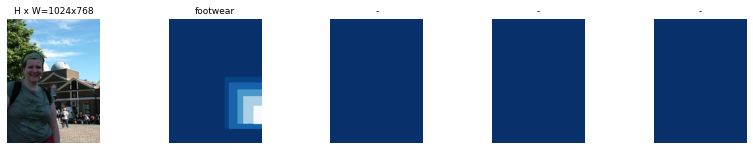

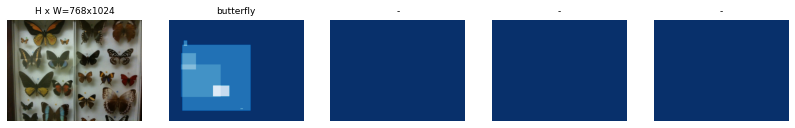

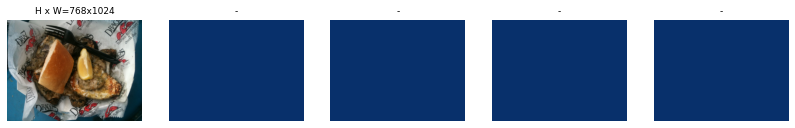

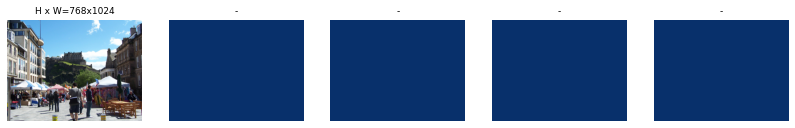

In [39]:
# Load and display random samples
image_ids = np.random.choice(dataset_train.image_ids, 4)
for image_id in image_ids:
    image = dataset_train.load_image(image_id)
    mask, class_ids = dataset_train.load_mask(image_id)
    visualize.display_top_masks(image, mask, class_ids, dataset_train.class_names)

In [40]:
import tensorflow as tf
import logging
logging.getLogger('tensorflow').disabled = True
tf.logging.set_verbosity(tf.logging.WARN)

In [41]:
# Create model in training mode
model = modellib.MaskRCNN(mode="training", config=config,
                          model_dir=MODEL_DIR)

In [42]:
# Which weights to start with?
init_with = "coco"  # imagenet, coco, or last

if init_with == "imagenet":
    model.load_weights(model.get_imagenet_weights(), by_name=True)
elif init_with == "coco":
    # Load weights trained on MS COCO, but skip layers that
    # are different due to the different number of classes
    # See README for instructions to download the COCO weights
    model.load_weights(COCO_MODEL_PATH, by_name=True,
                       exclude=["mrcnn_class_logits", "mrcnn_bbox_fc", 
                                "mrcnn_bbox", "mrcnn_mask"])
elif init_with == "last":
    # Load the last model you trained and continue training
    model.load_weights(model.find_last(), by_name=True)

In [43]:
# Train the head branches
# Passing layers="heads" freezes all layers except the head
# layers. You can also pass a regular expression to select
# which layers to train by name pattern.
model.train(dataset_train, dataset_val, 
            learning_rate=config.LEARNING_RATE, 
            epochs=20, 
            layers='heads')



Starting at epoch 0. LR=0.001

Checkpoint Path: /content/gdrive/MyDrive/logs/openimages20201213T0126/mask_rcnn_openimages_{epoch:04d}.h5
Selecting layers to train
fpn_c5p5               (Conv2D)
fpn_c4p4               (Conv2D)
fpn_c3p3               (Conv2D)
fpn_c2p2               (Conv2D)
fpn_p5                 (Conv2D)
fpn_p2                 (Conv2D)
fpn_p3                 (Conv2D)
fpn_p4                 (Conv2D)
In model:  rpn_model
    rpn_conv_shared        (Conv2D)
    rpn_class_raw          (Conv2D)
    rpn_bbox_pred          (Conv2D)
mrcnn_mask_conv1       (TimeDistributed)
mrcnn_mask_bn1         (TimeDistributed)
mrcnn_mask_conv2       (TimeDistributed)
mrcnn_mask_bn2         (TimeDistributed)
mrcnn_class_conv1      (TimeDistributed)
mrcnn_class_bn1        (TimeDistributed)
mrcnn_mask_conv3       (TimeDistributed)
mrcnn_mask_bn3         (TimeDistributed)
mrcnn_class_conv2      (TimeDistributed)
mrcnn_class_bn2        (TimeDistributed)
mrcnn_mask_conv4       (TimeDistributed)


/tensorflow-1.15.2/python3.6/tensorflow_core/python/framework/indexed_slices.py:424: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "
/tensorflow-1.15.2/python3.6/tensorflow_core/python/framework/indexed_slices.py:424: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "
/tensorflow-1.15.2/python3.6/tensorflow_core/python/framework/indexed_slices.py:424: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "
/usr/local/lib/python3.6/dist-packages/keras/engine/training.py:2039: UserWarning: Using a generator with `use_multiprocessing=True` and multiple workers 

Epoch 1/20
 999/1000 [============================>.] - ETA: 0s - loss: 2.7511 - rpn_class_loss: 0.1277 - rpn_bbox_loss: 0.8506 - mrcnn_class_loss: 0.5855 - mrcnn_bbox_loss: 0.6626 - mrcnn_mask_loss: 0.5247

/usr/local/lib/python3.6/dist-packages/keras/engine/training.py:2197: UserWarning: Using a generator with `use_multiprocessing=True` and multiple workers may duplicate your data. Please consider using the`keras.utils.Sequence class.
  UserWarning('Using a generator with `use_multiprocessing=True`'


1000/1000 [==============================] - 579s 579ms/step - loss: 2.7507 - rpn_class_loss: 0.1276 - rpn_bbox_loss: 0.8499 - mrcnn_class_loss: 0.5858 - mrcnn_bbox_loss: 0.6627 - mrcnn_mask_loss: 0.5246 - val_loss: 2.7852 - val_rpn_class_loss: 0.1322 - val_rpn_bbox_loss: 1.0128 - val_mrcnn_class_loss: 0.5053 - val_mrcnn_bbox_loss: 0.6691 - val_mrcnn_mask_loss: 0.4658
Epoch 2/20
1000/1000 [==============================] - 481s 481ms/step - loss: 2.3636 - rpn_class_loss: 0.0935 - rpn_bbox_loss: 0.7418 - mrcnn_class_loss: 0.5283 - mrcnn_bbox_loss: 0.5857 - mrcnn_mask_loss: 0.4142 - val_loss: 2.5057 - val_rpn_class_loss: 0.1030 - val_rpn_bbox_loss: 0.8643 - val_mrcnn_class_loss: 0.5022 - val_mrcnn_bbox_loss: 0.6035 - val_mrcnn_mask_loss: 0.4326
Epoch 3/20
1000/1000 [==============================] - 480s 480ms/step - loss: 2.2527 - rpn_class_loss: 0.0896 - rpn_bbox_loss: 0.7195 - mrcnn_class_loss: 0.4763 - mrcnn_bbox_loss: 0.5728 - mrcnn_mask_loss: 0.3946 - val_loss: 2.2998 - val_rpn_cla

In [44]:
# Fine tune all layers
# Passing layers="all" trains all layers. You can also 
# pass a regular expression to select which layers to
# train by name pattern.
model.train(dataset_train, dataset_val, 
            learning_rate=config.LEARNING_RATE / 10,
            epochs=5, 
            layers="all")


Starting at epoch 20. LR=0.0001

Checkpoint Path: /content/gdrive/MyDrive/logs/openimages20201213T0126/mask_rcnn_openimages_{epoch:04d}.h5
Selecting layers to train
conv1                  (Conv2D)
bn_conv1               (BatchNorm)
res2a_branch2a         (Conv2D)
bn2a_branch2a          (BatchNorm)
res2a_branch2b         (Conv2D)
bn2a_branch2b          (BatchNorm)
res2a_branch2c         (Conv2D)
res2a_branch1          (Conv2D)
bn2a_branch2c          (BatchNorm)
bn2a_branch1           (BatchNorm)
res2b_branch2a         (Conv2D)
bn2b_branch2a          (BatchNorm)
res2b_branch2b         (Conv2D)
bn2b_branch2b          (BatchNorm)
res2b_branch2c         (Conv2D)
bn2b_branch2c          (BatchNorm)
res2c_branch2a         (Conv2D)
bn2c_branch2a          (BatchNorm)
res2c_branch2b         (Conv2D)
bn2c_branch2b          (BatchNorm)
res2c_branch2c         (Conv2D)
bn2c_branch2c          (BatchNorm)
res3a_branch2a         (Conv2D)
bn3a_branch2a          (BatchNorm)
res3a_branch2b         (Conv2D

/tensorflow-1.15.2/python3.6/tensorflow_core/python/framework/indexed_slices.py:424: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "
/tensorflow-1.15.2/python3.6/tensorflow_core/python/framework/indexed_slices.py:424: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "
/tensorflow-1.15.2/python3.6/tensorflow_core/python/framework/indexed_slices.py:424: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "
/usr/local/lib/python3.6/dist-packages/keras/engine/training.py:2039: UserWarning: Using a generator with `use_multiprocessing=True` and multiple workers 

In [45]:
class InferenceConfig(MicrocontrollerConfig):
    GPU_COUNT = 1
    IMAGES_PER_GPU = 1

inference_config = InferenceConfig()

# Recreate the model in inference mode
model = modellib.MaskRCNN(mode="inference", 
                          config=inference_config,
                          model_dir=MODEL_DIR)

# Get path to saved weights
# Either set a specific path or find last trained weights
# model_path = os.path.join(ROOT_DIR, ".h5 file name here")
model_path = model.find_last()

# Load trained weights
print("Loading weights from ", model_path)
model.load_weights(model_path, by_name=True)

Loading weights from  /content/gdrive/MyDrive/logs/openimages20201213T0126/mask_rcnn_openimages_0020.h5
Re-starting from epoch 20


In [85]:
def get_ax(rows=1, cols=1, size=8):
    """Return a Matplotlib Axes array to be used in
    all visualizations in the notebook. Provide a
    central point to control graph sizes.
    
    Change the default size attribute to control the size
    of rendered images
    """
    _, ax = plt.subplots(rows, cols, figsize=(size*cols, size*rows))
    return ax

original_image           shape: (1024, 1024, 3)       min:    0.00000  max:  255.00000  uint8
image_meta               shape: (93,)                 min:    0.00000  max: 5923.00000  float64
gt_class_id              shape: (0,)                  min:             max:             int32
gt_bbox                  shape: (0, 4)                min:             max:             int32
gt_mask                  shape: (1024, 1024, 0)       min:             max:             uint8

*** No instances to display *** 



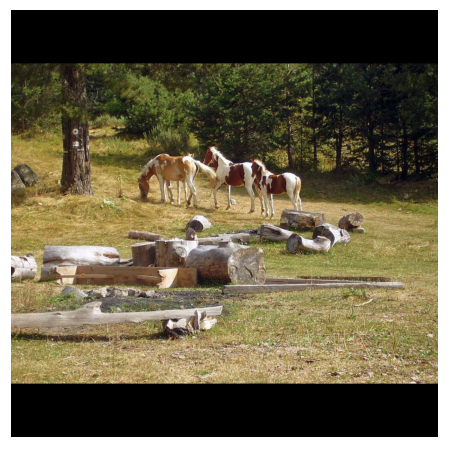

In [123]:
# Test on a random image
image_id = random.choice(dataset_val.image_ids)
original_image, image_meta, gt_class_id, gt_bbox, gt_mask =\
    modellib.load_image_gt(dataset_val, inference_config, 
                           image_id, use_mini_mask=False)

log("original_image", original_image)
log("image_meta", image_meta)
log("gt_class_id", gt_class_id)
log("gt_bbox", gt_bbox)
log("gt_mask", gt_mask)

visualize.display_instances(original_image, gt_bbox, gt_mask, gt_class_id, 
                            dataset_train.class_names, figsize=(8, 8))

Processing 1 images
image                    shape: (1024, 1024, 3)       min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 93)               min:    0.00000  max: 1024.00000  int64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32


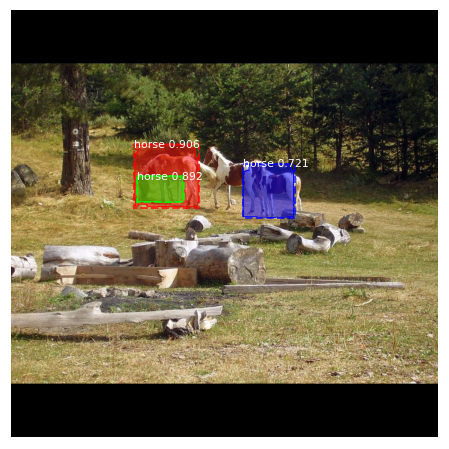

In [124]:
results = model.detect([original_image], verbose=1)

r = results[0]
visualize.display_instances(original_image, r['rois'], r['masks'], r['class_ids'], 
                            dataset_val.class_names, r['scores'], ax=get_ax())

In [49]:
# Compute VOC-Style mAP @ IoU=0.5
# Running on 10 images. Increase for better accuracy.
image_ids = dataset_val.image_ids
APs = []
for image_id in image_ids:
    # Load image and ground truth data
    image, image_meta, gt_class_id, gt_bbox, gt_mask =\
        modellib.load_image_gt(dataset_val, inference_config,
                               image_id, use_mini_mask=False)
    molded_images = np.expand_dims(modellib.mold_image(image, inference_config), 0)
    # Run object detection
    results = model.detect([image], verbose=0)
    r = results[0]
    # Compute AP
    AP, precisions, recalls, overlaps =\
        utils.compute_ap(gt_bbox, gt_class_id, gt_mask,
                         r["rois"], r["class_ids"], r["scores"], r['masks'])
    APs.append(AP)
    
print("mAP: ", np.mean(APs))

/content/Mask_RCNN/mrcnn/utils.py:734: RuntimeWarning: invalid value encountered in true_divide
  recalls = np.cumsum(pred_match > -1).astype(np.float32) / len(gt_match)
/content/Mask_RCNN/mrcnn/utils.py:734: RuntimeWarning: invalid value encountered in true_divide
  recalls = np.cumsum(pred_match > -1).astype(np.float32) / len(gt_match)
/content/Mask_RCNN/mrcnn/utils.py:734: RuntimeWarning: invalid value encountered in true_divide
  recalls = np.cumsum(pred_match > -1).astype(np.float32) / len(gt_match)
/content/Mask_RCNN/mrcnn/utils.py:734: RuntimeWarning: invalid value encountered in true_divide
  recalls = np.cumsum(pred_match > -1).astype(np.float32) / len(gt_match)
/content/Mask_RCNN/mrcnn/utils.py:734: RuntimeWarning: invalid value encountered in true_divide
  recalls = np.cumsum(pred_match > -1).astype(np.float32) / len(gt_match)
/content/Mask_RCNN/mrcnn/utils.py:734: RuntimeWarning: invalid value encountered in true_divide
  recalls = np.cumsum(pred_match > -1).astype(np.float

KeyboardInterrupt: ignored